In [ ]:
import datetime as dt
from urllib.request import urlopen
import numpy as np
import pandas as pd

daylist = []
TAlist = []
RNlist = []
SNlist = []

firstday = dt.datetime(2021,1,1)
now = dt.datetime.now()
daylist.append(firstday.strftime("%Y%m%d"))
for i in range(0, (now-firstday).days) :
    daylist.append((firstday + dt.timedelta(days = i+1)).strftime("%Y%m%d"))

for day in daylist :
    domain = "https://apihub.kma.go.kr/api/typ01/url/kma_sfcdd.php?tm={0}&stn=0&help=1&authKey=Oe59BoxnQP-ufQaMZxD_-Q".format(day)
    with urlopen(domain) as f:
        lines = f.readlines()
        lines = lines[65:]
        del lines[-1]
        TAsum = 0
        RNsum = 0
        SNsum = 0
        for itr in lines :
            itr = str(itr)
            flg = 0
            idx = 0

            for i in itr :
                idx += 1
                if i == ',' :
                    flg += 1
                if flg == 10 :
                    TAidx_start = idx + 1
                if flg == 11 :
                    TAidx_end = idx
                if flg == 38 :
                    RNidx_start = idx + 1
                if flg == 39 :
                    RNidx_end = idx
                if flg == 47 :
                    SNidx_start = idx + 1
                if flg == 48 :
                    SNidx_end = idx
            TAsum += float(itr[TAidx_start : TAidx_end])
            if float(itr[RNidx_start : RNidx_end]) > 0 :
                RNsum += float(itr[RNidx_start : RNidx_end])
            if float(itr[SNidx_start : SNidx_end]) > 0 :
                SNsum += float(itr[SNidx_start : SNidx_end])
        TAmean = TAsum/len(lines)
        RNmean = RNsum/len(lines)
        SNmean = SNsum/len(lines)
        TAlist.append(TAmean)
        RNlist.append(RNmean)
        SNlist.append(SNmean)
        
    

weather_dic = {
    'day' : daylist,
    'Temperature' : TAlist,
    'Rainfall' : RNlist,
    'Snowfall' : SNlist
}
weather_df = pd.DataFrame(weather_dic)
weather_df

In [4]:
import requests
from bs4 import BeautifulSoup
import re
dramacnt = 0
rnbcnt = 0
balladcnt = 0
popcnt = 0
carolcnt = 0
dancecnt = 0
rockcnt = 0
eleccnt = 0
trotcnt = 0
indicnt = 0
bluescnt = 0
genrlist = []
genr = ['드라마', 'R&B/소울', '발라드', '팝', '캐롤', '댄스', '락', '일렉트로니카', '트로트', '인디', '블루스/포크']
warmlist = ['드라마', 'R&B/소울', '발라드', '팝', '캐롤']
excitinglist = ['댄스', '락', '일렉트로니카', '트로트', '팝']
wetlist = ['드라마', 'R&B/소울', '발라드', '인디']
solitarylist = ['발라드', '인디', '블루스/포크']
bouncelist = ['댄스', '일렉트로니카', '랩/힙합', '트로트']
etclist = ['그외장르', '한국영화', '월드뮤직']
ignorelist = ['OST', 'POP', '가요', '전체']

header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
          
def countgen(day) :
    warm_cnt = 0
    exciting_cnt = 0
    wet_cnt = 0
    solitary_cnt = 0
    bounce_cnt = 0
    etc_cnt = 0
    genrelist = []
    
    for i in range(1, 5) :
        url = 'https://www.genie.co.kr/chart/top200?ditc=D&ymd={0}&hh=06&rtm=N&pg={1}'.format(day, i)
        data = requests.get(url, headers = header)
        soup = BeautifulSoup(data.text, 'html.parser')
        trs = soup.select('#body-content > div.newest-list > div > table > tbody > tr')
        for tr in trs:
            a_tag = tr.select_one('td.info > a.title.ellipsis')
            if a_tag is not None :
                myStr = str(tr.find_all("td")[2].a)
                p = re.compile('[0-9]+')
                m = p.search(myStr)
                id = m.group()
                url = 'https://www.genie.co.kr/detail/albumInfo?axnm={0}'.format(id)
                data_id = requests.get(url, headers = header)
                soup_id = BeautifulSoup(data_id.text, 'html.parser')
                li = soup_id.select('#body-content > div.album-detail-infos > div.info-zone > ul > li')
                genre = li[1].select('span')[1].string
                genrelist.append(genre)
    genre_dic = {
        'genre' : genrelist
    }
    genre_df = pd.DataFrame(genre_dic)

    for gen in genre_df.genre :
        for g in gen.split(' / ') :
            genrlist.append(g)
            if g in ignorelist :
                continue
            if g in warmlist :
                warm_cnt += 1
            if g in excitinglist :
                exciting_cnt += 1
            if g in wetlist :
                wet_cnt += 1
            if g in solitarylist :
                solitary_cnt += 1
            if g in bouncelist :
                bounce_cnt += 1
            if g in etclist :
                etc_cnt += 1
                
    weather_df.loc[weather_df.day == day, 'warm'] = warm_cnt
    weather_df.loc[weather_df.day == day, 'exciting'] = exciting_cnt
    weather_df.loc[weather_df.day == day, 'wet'] = wet_cnt
    weather_df.loc[weather_df.day == day, 'solitary'] = solitary_cnt
    weather_df.loc[weather_df.day == day, 'bounce'] = bounce_cnt
    weather_df.loc[weather_df.day == day, 'etc'] = etc_cnt
    print("done")

In [5]:
daylist = []
daylist = weather_df.day
for day in daylist[0:5] :
    countgen(day)

done
done
done
done


ConnectionError: HTTPSConnectionPool(host='www.genie.co.kr', port=443): Max retries exceeded with url: /detail/albumInfo?axnm=81196392 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000179CA8942B0>: Failed to establish a new connection: [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다'))

In [146]:
for day in daylist[5:10] :
    countgen(day)

done
done
done
done
done


In [24]:
for day in daylist[10:15] :
    countgen(day)

done
done
done
done
done


In [25]:
for day in daylist[15:20] :
    countgen(day)

done
done
done
done
done


In [26]:
for day in daylist[20:25] :
    countgen(day)

done
done
done
done
done


In [27]:
for day in daylist[25:30] :
    countgen(day)

done
done
done
done
done


In [28]:
for day in daylist[30:35] :
    countgen(day)

done
done
done
done
done


In [29]:
for day in daylist[35:40] :
    countgen(day)

done
done
done
done
done


In [31]:
for day in daylist[40:45] :
    countgen(day)

done
done
done
done
done


In [32]:
for day in daylist[45:50] :
    countgen(day)

done
done
done
done
done


In [33]:
for day in daylist[50:55] :
    countgen(day)

done
done
done
done
done


In [34]:
for day in daylist[55:60] :
    countgen(day)

done
done
done
done
done


In [35]:
for day in daylist[60:65] :
    countgen(day)

done
done
done
done
done


In [36]:
for day in daylist[65:70] :
    countgen(day)

done
done
done
done
done


In [37]:
for day in daylist[70:75] :
    countgen(day)

done
done
done
done
done


In [38]:
for day in daylist[75:80] :
    countgen(day)

done
done
done
done
done


In [39]:
for day in daylist[80:85] :
    countgen(day)

done
done
done
done
done


In [40]:
for day in daylist[85:90] :
    countgen(day)

done
done
done
done
done


In [41]:
for day in daylist[90:95] :
    countgen(day)

done
done
done
done
done


In [43]:
for day in daylist[95:100] :
    countgen(day)

done
done
done
done
done


In [45]:
for day in daylist[100:105] :
    countgen(day)

done
done
done
done
done


In [46]:
for day in daylist[105:110] :
    countgen(day)

done
done
done
done
done


In [47]:
for day in daylist[110:115] :
    countgen(day)

done
done
done
done
done


In [48]:
for day in daylist[115:120] :
    countgen(day)

done
done
done
done
done


In [49]:
for day in daylist[120:125] :
    countgen(day)

done
done
done
done
done


In [50]:
for day in daylist[125:130] :
    countgen(day)

done
done
done
done
done


In [51]:
for day in daylist[130:135] :
    countgen(day)

done
done
done
done
done


In [52]:
for day in daylist[135:140] :
    countgen(day)

done
done
done
done
done


In [53]:
for day in daylist[140:145] :
    countgen(day)

done
done
done
done
done


In [54]:
for day in daylist[145:150] :
    countgen(day)

done
done
done
done
done


In [55]:
for day in daylist[150:155] :
    countgen(day)

done
done
done
done
done


In [56]:
for day in daylist[155:160] :
    countgen(day)

done
done
done
done
done


In [58]:
for day in daylist[160:165] :
    countgen(day)

done
done
done
done
done


In [60]:
for day in daylist[165:170] :
    countgen(day)

done
done
done
done
done


In [61]:
for day in daylist[170:175] :
    countgen(day)

done
done
done
done
done


In [62]:
for day in daylist[175:180] :
    countgen(day)

done
done
done
done
done


In [63]:
for day in daylist[180:185] :
    countgen(day)

done
done
done
done
done


In [64]:
for day in daylist[185:190] :
    countgen(day)

done
done
done
done
done


In [65]:
for day in daylist[190:195] :
    countgen(day)

done
done
done
done
done


In [66]:
for day in daylist[195:200] :
    countgen(day)

done
done
done
done
done


In [67]:
for day in daylist[200:205] :
    countgen(day)

done
done
done
done
done


In [68]:
for day in daylist[205:210] :
    countgen(day)

done
done
done
done
done


In [69]:
for day in daylist[210:215] :
    countgen(day)

done
done
done
done
done


In [70]:
for day in daylist[215:220] :
    countgen(day)

done
done
done
done
done


In [71]:
for day in daylist[220:225] :
    countgen(day)

done
done
done
done
done


In [73]:
for day in daylist[225:230] :
    countgen(day)

done
done
done
done
done


In [75]:
for day in daylist[230:235] :
    countgen(day)

done
done
done
done
done


In [76]:
for day in daylist[235:240] :
    countgen(day)

done
done
done
done
done


In [77]:
for day in daylist[240:245] :
    countgen(day)

done
done
done
done
done


In [78]:
for day in daylist[245:250] :
    countgen(day)

done
done
done
done
done


In [79]:
for day in daylist[250:255] :
    countgen(day)

done
done
done
done
done


In [80]:
for day in daylist[255:260] :
    countgen(day)

done
done
done
done
done


In [81]:
for day in daylist[260:265] :
    countgen(day)

done
done
done
done
done


In [82]:
for day in daylist[265:270] :
    countgen(day)

done
done
done
done
done


In [83]:
for day in daylist[270:275] :
    countgen(day)

done
done
done
done
done


In [84]:
for day in daylist[275:280] :
    countgen(day)

done
done
done
done
done


In [85]:
for day in daylist[280:285] :
    countgen(day)

done
done
done
done
done


In [87]:
for day in daylist[285:290] :
    countgen(day)

done
done
done
done
done


In [89]:
for day in daylist[290:295] :
    countgen(day)

done
done
done
done
done


In [91]:
for day in daylist[295:300] :
    countgen(day)

done
done
done
done
done


In [92]:
for day in daylist[300:305] :
    countgen(day)

done
done
done
done
done


In [93]:
for day in daylist[305:310] :
    countgen(day)

done
done
done
done
done


In [94]:
for day in daylist[310:315] :
    countgen(day)

done
done
done
done
done


In [95]:
for day in daylist[315:320] :
    countgen(day)

done
done
done
done
done


In [96]:
for day in daylist[320:325] :
    countgen(day)

done
done
done
done
done


In [97]:
for day in daylist[325:330] :
    countgen(day)

done
done
done
done
done


In [98]:
for day in daylist[330:335] :
    countgen(day)

done
done
done
done
done


In [99]:
for day in daylist[335:340] :
    countgen(day)

done
done
done
done
done


In [102]:
for day in daylist[340:345] :
    countgen(day)

1
2
3
4
3
4
3
4
3
4
5
6
7
done
1
2
3
4
3
4
3
4
3
4
5
6
7
done
1
2
3
4
3
4
3
4
3
4
5
6
7
done
1
2
3
4
3
4
3
4
3
4
5
6
7
done
1
2
3
4
3
4
3
4
3
4
5
6
7
done


In [104]:
for day in daylist[345:350] :
    countgen(day)

done
done
done
done
done


In [105]:
for day in daylist[350:355] :
    countgen(day)

done
done
done
done
done


In [106]:
for day in daylist[355:360] :
    countgen(day)

done
done
done
done
done


In [107]:
for day in daylist[360:365] :
    countgen(day)

done
done
done
done
done


In [108]:
for day in daylist[365:370] :
    countgen(day)

done
done
done
done
done


In [109]:
for day in daylist[370:375] :
    countgen(day)

done
done
done
done
done


In [110]:
for day in daylist[375:380] :
    countgen(day)

done
done
done
done
done


In [111]:
for day in daylist[380:385] :
    countgen(day)

done
done
done
done
done


In [112]:
for day in daylist[385:390] :
    countgen(day)

done
done
done
done
done


In [113]:
for day in daylist[390:395] :
    countgen(day)

done
done
done
done
done


In [115]:
for day in daylist[395:400] :
    countgen(day)

done
done
done
done
done


In [117]:
for day in daylist[400:405] :
    countgen(day)

done
done
done
done
done


In [118]:
for day in daylist[405:410] :
    countgen(day)

done
done
done
done
done


In [119]:
for day in daylist[410:415] :
    countgen(day)

done
done
done
done
done


In [120]:
for day in daylist[415:420] :
    countgen(day)

done
done
done
done
done


In [121]:
for day in daylist[420:425] :
    countgen(day)

done
done
done
done
done


In [122]:
for day in daylist[425:430] :
    countgen(day)

done
done
done
done
done


In [123]:
for day in daylist[430:435] :
    countgen(day)

done
done
done
done
done


In [124]:
for day in daylist[435:440] :
    countgen(day)

done
done
done
done
done


In [125]:
for day in daylist[440:445] :
    countgen(day)

done
done
done
done
done


In [126]:
for day in daylist[445:450] :
    countgen(day)

done
done
done
done
done


In [127]:
for day in daylist[450:455] :
    countgen(day)

done
done
done
done
done


In [129]:
for day in daylist[455:460] :
    countgen(day)

done
done
done
done
done


In [131]:
for day in daylist[460:465] :
    countgen(day)

done
done
done
done
done


In [ ]:
for day in daylist[465:470] :
    countgen(day)

In [ ]:
for day in daylist[470:475] :
    countgen(day)

In [ ]:
for day in daylist[475:480] :
    countgen(day)

In [ ]:
for day in daylist[480:485] :
    countgen(day)

In [ ]:
for day in daylist[485:490] :
    countgen(day)

In [ ]:
for day in daylist[490:495] :
    countgen(day)

In [ ]:
for day in daylist[495:500] :
    countgen(day)

In [ ]:
for day in daylist[500:505] :
    countgen(day)

In [ ]:
for day in daylist[505:510] :
    countgen(day)

In [ ]:
for day in daylist[510:515] :
    countgen(day)

In [ ]:
for day in daylist[515:520] :
    countgen(day)

In [ ]:
for day in daylist[520:525] :
    countgen(day)

In [ ]:
for day in daylist[525:530] :
    countgen(day)

In [ ]:
for day in daylist[530:535] :
    countgen(day)

In [ ]:
for day in daylist[535:540] :
    countgen(day)

In [ ]:
for day in daylist[540:545] :
    countgen(day)

In [ ]:
for day in daylist[545:550] :
    countgen(day)

In [ ]:
for day in daylist[550:555] :
    countgen(day)

In [ ]:
for day in daylist[555:560] :
    countgen(day)

In [ ]:
for day in daylist[560:565] :
    countgen(day)

In [ ]:
for day in daylist[565:570] :
    countgen(day)

In [ ]:
for day in daylist[570:575] :
    countgen(day)

In [ ]:
for day in daylist[575:580] :
    countgen(day)

In [ ]:
for day in daylist[580:585] :
    countgen(day)

In [ ]:
for day in daylist[585:590] :
    countgen(day)

In [ ]:
for day in daylist[590:595] :
    countgen(day)

In [ ]:
for day in daylist[595:600] :
    countgen(day)

In [ ]:
for day in daylist[600:605] :
    countgen(day)

In [ ]:
for day in daylist[605:610] :
    countgen(day)

In [ ]:
for day in daylist[610:615] :
    countgen(day)

In [ ]:
for day in daylist[615:620] :
    countgen(day)

In [ ]:
for day in daylist[620:625] :
    countgen(day)

In [ ]:
for day in daylist[625:630] :
    countgen(day)

In [ ]:
for day in daylist[630:635] :
    countgen(day)

In [ ]:
for day in daylist[635:640] :
    countgen(day)

In [ ]:
for day in daylist[640:645] :
    countgen(day)

In [ ]:
for day in daylist[645:650] :
    countgen(day)

In [ ]:
for day in daylist[650:655] :
    countgen(day)

In [ ]:
for day in daylist[655:660] :
    countgen(day)

In [ ]:
for day in daylist[660:665] :
    countgen(day)

In [ ]:
for day in daylist[665:670] :
    countgen(day)

In [ ]:
for day in daylist[670:675] :
    countgen(day)

In [ ]:
for day in daylist[675:680] :
    countgen(day)

In [ ]:
for day in daylist[680:685] :
    countgen(day)

In [ ]:
for day in daylist[685:690] :
    countgen(day)

In [ ]:
for day in daylist[690:695] :
    countgen(day)

In [ ]:
for day in daylist[695:700] :
    countgen(day)

In [ ]:
for day in daylist[700:705] :
    countgen(day)

In [ ]:
for day in daylist[705:710] :
    countgen(day)

In [ ]:
for day in daylist[710:715] :
    countgen(day)

In [ ]:
for day in daylist[715:720] :
    countgen(day)

In [ ]:
for day in daylist[720:725] :
    countgen(day)

In [ ]:
for day in daylist[725:730] :
    countgen(day)

In [ ]:
for day in daylist[730:735] :
    countgen(day)

In [ ]:
for day in daylist[735:740] :
    countgen(day)

In [ ]:
for day in daylist[740:745] :
    countgen(day)

In [ ]:
for day in daylist[745:750] :
    countgen(day)

In [ ]:
for day in daylist[750:755] :
    countgen(day)

In [ ]:
for day in daylist[755:760] :
    countgen(day)

In [ ]:
for day in daylist[760:765] :
    countgen(day)

In [43]:
for day in daylist[765:770] :
    countgen(day)

done
done
done
done
done


In [45]:
for day in daylist[770:775] :
    countgen(day)

done
done
done
done
done


In [44]:
for day in daylist[775:780] :
    countgen(day)

done
done
done
done
done


In [46]:
for day in daylist[780:785] :
    countgen(day)

done
done
done
done
done


In [47]:
for day in daylist[785:790] :
    countgen(day)

done
done
done
done
done


In [48]:
for day in daylist[790:795] :
    countgen(day)

done
done
done
done
done


In [49]:
for day in daylist[795:800] :
    countgen(day)

done
done
done
done
done


In [26]:
for day in daylist[800:805] :
    countgen(day)

done
done
done
done
done


In [25]:
for day in daylist[805:810] :
    countgen(day)

done
done
done
done
done


In [24]:
for day in daylist[810:815] :
    countgen(day)

done
done
done
done
done


In [23]:
for day in daylist[815:820] :
    countgen(day)

done
done
done
done
done


In [22]:
for day in daylist[820:825] :
    countgen(day)

done
done
done
done
done


In [21]:
for day in daylist[825:830] :
    countgen(day)

done
done
done
done
done


In [20]:
for day in daylist[830:835] :
    countgen(day)

done
done
done
done
done


In [18]:
for day in daylist[835:840] :
    countgen(day)

done
done
done
done
done


In [16]:
for day in daylist[840:845] :
    countgen(day)

done
done
done
done
done


In [15]:
for day in daylist[845:850] :
    countgen(day)

done
done
done
done
done


In [14]:
for day in daylist[850:855] :
    countgen(day)

done
done
done
done
done


In [13]:
for day in daylist[855:860] :
    countgen(day)

done
done
done
done
done


In [12]:
for day in daylist[860:865] :
    countgen(day)

done
done
done
done
done


In [11]:
for day in daylist[865:870] :
    countgen(day)

done
done
done
done
done


In [10]:
for day in daylist[870:875] :
    countgen(day)

done
done
done
done
done


In [9]:
for day in daylist[875:880] :
    countgen(day)

done
done
done
done
done


In [8]:
for day in daylist[880:885] :
    countgen(day)

done
done
done
done
done


In [7]:
for day in daylist[885:890] :
    countgen(day)

done
done
done
done
done


In [6]:
for day in daylist[890:] :
    countgen(day)

done
done
done
done


894


,day,Temperature,Rainfall,Snowfall
0,20210101,2.108421,0.047368,71.642105
1,20210102,1.929474,0.098947,33.957895
2,20210103,1.554737,0.000000,5.578947
3,20210104,4.453684,0.041053,99.000000
4,20210105,2.353684,0.054737,13.736842
...,...,...,...,...
889,20230609,27.809278,0.028866,0.000000
890,20230610,28.302062,1.698969,0.000000
891,20230611,27.340206,0.424742,0.000000
892,20230612,27.429897,0.169072,0.000000


In [57]:
weather_df.to_csv('weather_df.csv', index = False, encoding = 'utf-8')

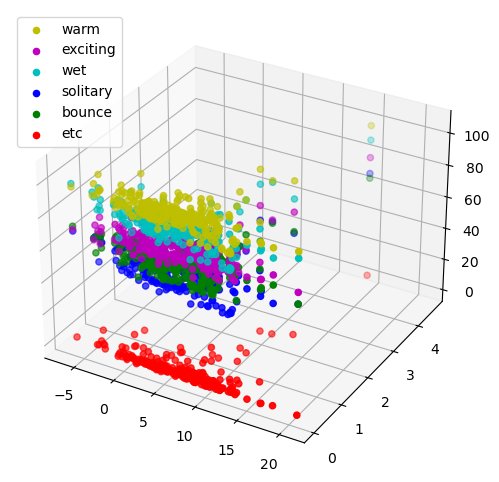

In [119]:
TAlist = []
RNlist = []
warmlist = []
excitinglist = []
wetlist = []
solitarylist = []
bouncelist = []
etclist = []



for i in range(0, 58) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)

for i in range(334, 423) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)
    
for i in range(699, 788) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)

Gen_dic = {
    'warm' : warmlist,
    'exciting' : excitinglist,
    'wet' : wetlist,
    'solitary' : solitarylist,
    'bounce' : bouncelist,
    'etc' : etclist
}
colors = list("rgbcmy")
#print(Gen_dic)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(TAlist, RNlist, Gen_dic['warm'], color=colors.pop(), label='warm')
ax1.scatter(TAlist, RNlist, Gen_dic['exciting'], color=colors.pop(), label='exciting')
ax1.scatter(TAlist, RNlist, Gen_dic['wet'], color=colors.pop(), label='wet')
ax1.scatter(TAlist, RNlist, Gen_dic['solitary'], color=colors.pop(), label='solitary')
ax1.scatter(TAlist, RNlist, Gen_dic['bounce'], color=colors.pop(), label='bounce')
ax1.scatter(TAlist, RNlist, Gen_dic['etc'], color=colors.pop(), label='etc')
ax1.legend()




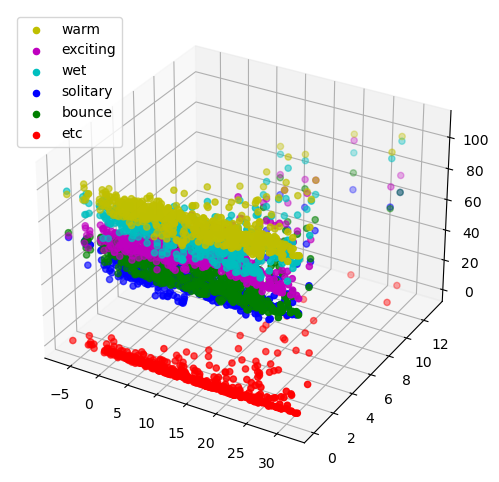

In [120]:
for i in range(59, 149) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)

for i in range(424, 545) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)
    
for i in range(789, 880) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)

Gen_dic = {
    'warm' : warmlist,
    'exciting' : excitinglist,
    'wet' : wetlist,
    'solitary' : solitarylist,
    'bounce' : bouncelist,
    'etc' : etclist
}
colors = list("rgbcmy")

fig = plt.figure(figsize=(6,6))
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(TAlist, RNlist, Gen_dic['warm'], color=colors.pop(), label='warm')
ax2.scatter(TAlist, RNlist, Gen_dic['exciting'], color=colors.pop(), label='exciting')
ax2.scatter(TAlist, RNlist, Gen_dic['wet'], color=colors.pop(), label='wet')
ax2.scatter(TAlist, RNlist, Gen_dic['solitary'], color=colors.pop(), label='solitary')
ax2.scatter(TAlist, RNlist, Gen_dic['bounce'], color=colors.pop(), label='bounce')
ax2.scatter(TAlist, RNlist, Gen_dic['etc'], color=colors.pop(), label='etc')
ax2.legend()

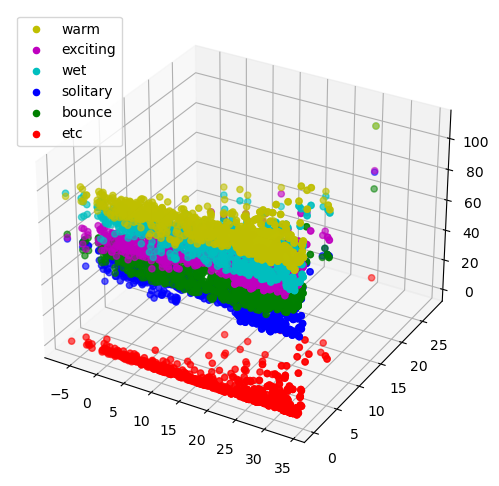

In [122]:
for i in range(150, 274) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)

for i in range(546, 637) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)
    
for i in range(881, 893) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)

Gen_dic = {
    'warm' : warmlist,
    'exciting' : excitinglist,
    'wet' : wetlist,
    'solitary' : solitarylist,
    'bounce' : bouncelist,
    'etc' : etclist
}
colors = list("rgbcmy")

fig = plt.figure(figsize=(6,6))
ax3 = fig.add_subplot(111, projection='3d')
ax3.scatter(TAlist, RNlist, Gen_dic['warm'], color=colors.pop(), label='warm')
ax3.scatter(TAlist, RNlist, Gen_dic['exciting'], color=colors.pop(), label='exciting')
ax3.scatter(TAlist, RNlist, Gen_dic['wet'], color=colors.pop(), label='wet')
ax3.scatter(TAlist, RNlist, Gen_dic['solitary'], color=colors.pop(), label='solitary')
ax3.scatter(TAlist, RNlist, Gen_dic['bounce'], color=colors.pop(), label='bounce')
ax3.scatter(TAlist, RNlist, Gen_dic['etc'], color=colors.pop(), label='etc')
ax3.legend()

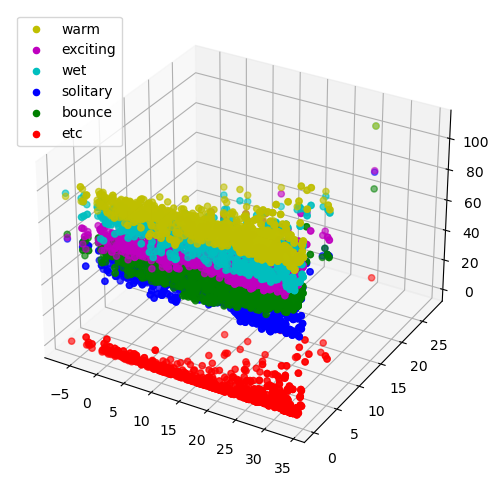

In [123]:
for i in range(277, 366) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)

for i in range(638, 729) :
    TAlist.append(weather_df.iloc[i].Temperature)
    RNlist.append(weather_df.iloc[i].Rainfall)
    warmlist.append(weather_df.iloc[i].warm)
    excitinglist.append(weather_df.iloc[i].exciting)
    wetlist.append(weather_df.iloc[i].wet)
    solitarylist.append(weather_df.iloc[i].solitary)
    bouncelist.append(weather_df.iloc[i].bounce)
    etclist.append(weather_df.iloc[i].etc)

Gen_dic = {
    'warm' : warmlist,
    'exciting' : excitinglist,
    'wet' : wetlist,
    'solitary' : solitarylist,
    'bounce' : bouncelist,
    'etc' : etclist
}
colors = list("rgbcmy")

fig = plt.figure(figsize=(6,6))
ax3 = fig.add_subplot(111, projection='3d')
ax3.scatter(TAlist, RNlist, Gen_dic['warm'], color=colors.pop(), label='warm')
ax3.scatter(TAlist, RNlist, Gen_dic['exciting'], color=colors.pop(), label='exciting')
ax3.scatter(TAlist, RNlist, Gen_dic['wet'], color=colors.pop(), label='wet')
ax3.scatter(TAlist, RNlist, Gen_dic['solitary'], color=colors.pop(), label='solitary')
ax3.scatter(TAlist, RNlist, Gen_dic['bounce'], color=colors.pop(), label='bounce')
ax3.scatter(TAlist, RNlist, Gen_dic['etc'], color=colors.pop(), label='etc')
ax3.legend()

In [136]:
from scipy import stats
from statsmodels.formula.api import ols, glm 
from statsmodels.graphics.regressionplots import plot_partregress_grid

m1 = ols ( 'warm~Temperature+Rainfall+Snowfall', data=weather_df).fit()
m1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   warm   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.379
Date:                Tue, 13 Jun 2023   Prob (F-statistic):             0.0684
Time:                        23:41:22   Log-Likelihood:                -2568.2
No. Observations:                 894   AIC:                             5144.
Df Residuals:                     890   BIC:                             5164.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      98.3681      0.380    259.153      0.000      97.623      99.113
Temperature     0.0031      0.018      0.170      0.865      -0.033       0.039
Rainfall        0.1058      0.076      1.400      0.162      -0.042       0.254
Snowfall       -0.0089      0.005     -1.812      0.070      -0.018       0.001
==============================================================================
Omnibus:                        6.346   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.400
Skew:                          -0.191   Prob(JB):                       0.0408
Kurtosis:                       2.840   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


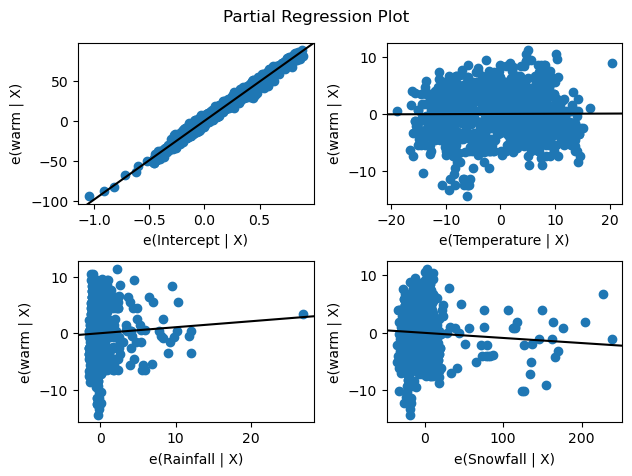

In [137]:
fig=plot_partregress_grid(m1)
fig.tight_layout(pad=1)

In [138]:
m2 = ols ( 'exciting~Temperature+Rainfall+Snowfall', data=weather_df).fit()
m2.summary() # coef가 회귀계수(얼마나 영향을 미쳤는가 = 기울기)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exciting   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     50.29
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           4.96e-30
Time:                        23:41:33   Log-Likelihood:                -2984.2
No. Observations:                 894   AIC:                             5976.
Df Residuals:                     890   BIC:                             5996.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      75.8388      0.604    125.459      0.000      74.652      77.025
Temperature     0.2821      0.029      9.654      0.000       0.225       0.339
Rainfall       -0.2558      0.120     -2.126      0.034      -0.492      -0.020
Snowfall       -0.0159      0.008     -2.043      0.041      -0.031      -0.001
==============================================================================
Omnibus:                       95.017   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.579
Skew:                           0.883   Prob(JB):                     1.46e-27
Kurtosis:                       3.447   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


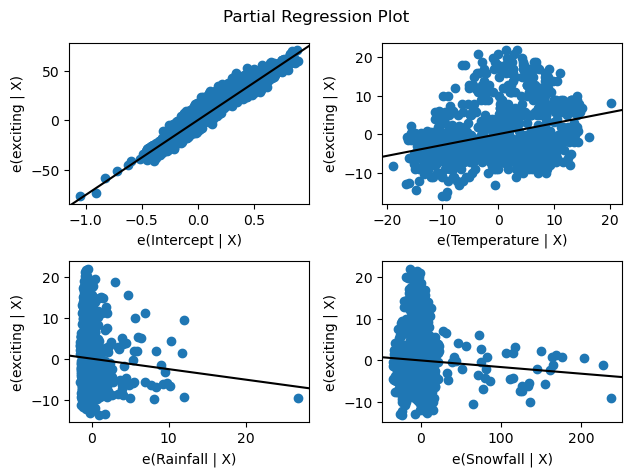

In [139]:
fig=plot_partregress_grid(m2)
fig.tight_layout(pad=1)

In [129]:
m3 = ols ( 'wet~Temperature+Rainfall+Snowfall', data=weather_df).fit()
m3.summary() # coef가 회귀계수(얼마나 영향을 미쳤는가 = 기울기)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wet   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.706
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.164
Time:                        23:39:47   Log-Likelihood:                -2889.8
No. Observations:                 894   AIC:                             5788.
Df Residuals:                     890   BIC:                             5807.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      90.4367      0.544    166.264      0.000      89.369      91.504
Temperature     0.0142      0.026      0.539      0.590      -0.037       0.066
Rainfall        0.1531      0.108      1.414      0.158      -0.059       0.366
Snowfall       -0.0072      0.007     -1.029      0.304      -0.021       0.007
==============================================================================
Omnibus:                       39.078   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.520
Skew:                          -0.363   Prob(JB):                     2.36e-07
Kurtosis:                       2.459   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


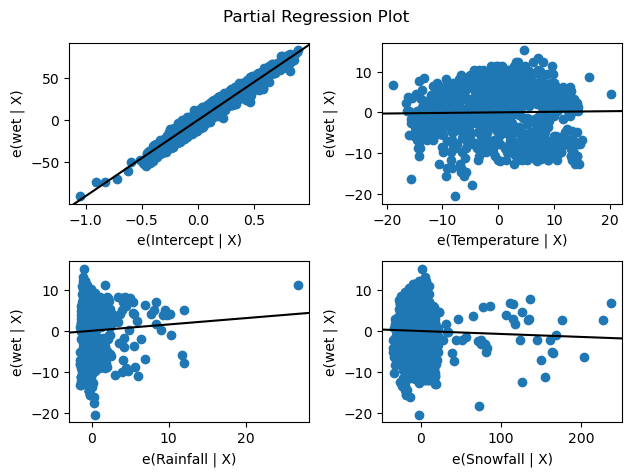

In [140]:
fig=plot_partregress_grid(m3)
fig.tight_layout(pad=1)

In [141]:
m4 = ols ( 'solitary~Temperature+Rainfall+Snowfall', data=weather_df).fit()
m4.summary() # coef가 회귀계수(얼마나 영향을 미쳤는가 = 기울기)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solitary   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     17.37
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           5.78e-11
Time:                        23:42:14   Log-Likelihood:                -2975.9
No. Observations:                 894   AIC:                             5960.
Df Residuals:                     890   BIC:                             5979.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      65.0656      0.599    108.646      0.000      63.890      66.241
Temperature    -0.1946      0.029     -6.722      0.000      -0.251      -0.138
Rainfall        0.0768      0.119      0.644      0.520      -0.157       0.311
Snowfall       -0.0083      0.008     -1.071      0.284      -0.023       0.007
==============================================================================
Omnibus:                       16.040   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.085
Skew:                           0.185   Prob(JB):                      0.00238
Kurtosis:                       2.566   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


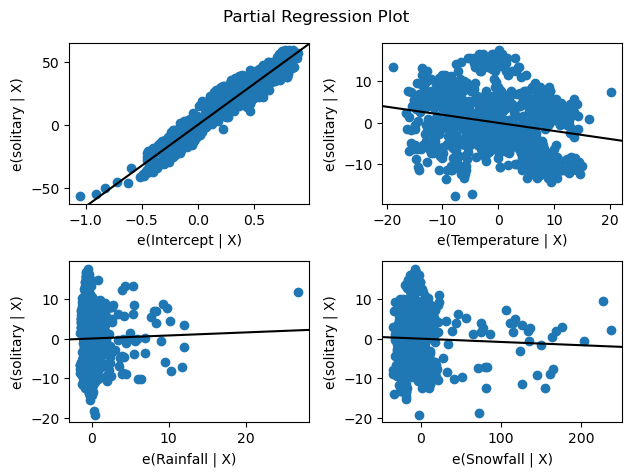

In [142]:
fig=plot_partregress_grid(m4)
fig.tight_layout(pad=1)

In [143]:
m5 = ols ( 'bounce~Temperature+Rainfall+Snowfall', data=weather_df).fit()
m5.summary() # coef가 회귀계수(얼마나 영향을 미쳤는가 = 기울기)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bounce   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.487
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.217
Time:                        23:42:21   Log-Likelihood:                -2905.1
No. Observations:                 894   AIC:                             5818.
Df Residuals:                     890   BIC:                             5837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      66.2202      0.553    119.678      0.000      65.134      67.306
Temperature     0.0474      0.027      1.773      0.077      -0.005       0.100
Rainfall       -0.0189      0.110     -0.171      0.864      -0.235       0.197
Snowfall        0.0132      0.007      1.845      0.065      -0.001       0.027
==============================================================================
Omnibus:                       13.432   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.065
Skew:                           0.264   Prob(JB):                      0.00146
Kurtosis:                       2.731   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


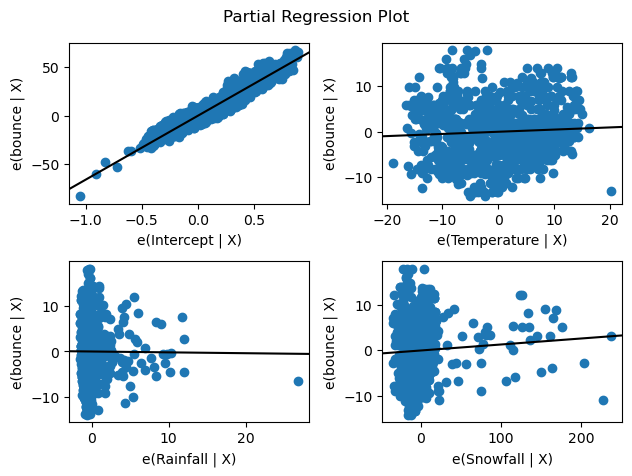

In [144]:
fig=plot_partregress_grid(m5)
fig.tight_layout(pad=1)